In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv('spam.csv', encoding="ISO-8859-1")


In [51]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
data.rename(columns={'v1':'Type','v2':'Content'},inplace=True)

In [53]:
df = data[['Type','Content']]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     5572 non-null   object
 1   Content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [55]:
df.head(5)

,Type,Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df.isnull().sum(axis=0)

Type       0
Content    0
dtype: int64

In [57]:
df.shape

(5572, 2)

In [58]:
df.describe()

,Type,Content
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [59]:
ham = (df.Type.value_counts()[0]/5572)*100
spam = (df.Type.value_counts()[1]/5572)*100
print(f'Percentage of Ham is {ham.round(2)}%')
print(f'Percentage of Spam is {spam.round(2)}%')

Percentage of Ham is 86.59%
Percentage of Spam is 13.41%


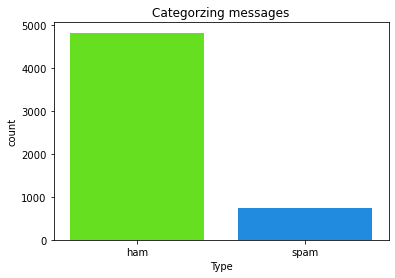

In [60]:
sns.countplot(x='Type', data=df,palette='gist_rainbow').set(title='Categorzing messages')
plt.show()

In [61]:
df['Content Size'] = df['Content'].apply(len)
df.head(5)

,Type,Content,Content Size
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


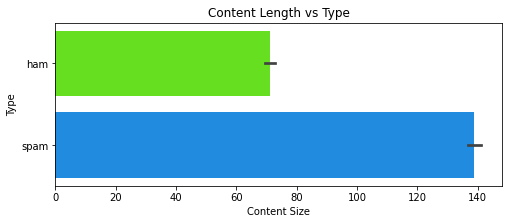

In [62]:
figsize = (8, 3)
plt.figure(figsize=figsize)
sns.barplot(data=df, x='Content Size', y='Type', palette='gist_rainbow')
plt.title('Content Length vs Type') 
plt.show()

In [64]:
le = LabelEncoder()
le.fit(df['Type'])
df['Encoded Type'] = le.transform(df['Type'])

In [66]:
x = df['Content']
y = df['Encoded Type']

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
x_vector = x.toarray()


In [70]:
X_train,X_test,y_train,y_test = train_test_split(x_vector,y,test_size=0.2,random_state=0)
X_train.shape

(4457, 8672)

In [71]:
model_MNB = MultinomialNB()
model_MNB.fit(X_train,y_train)
print('Training Score :',model_MNB.score(X_train,y_train))
print('Test Score :',model_MNB.score(X_test,y_test))

Training Score : 0.9699349338119811
Test Score : 0.9488789237668162


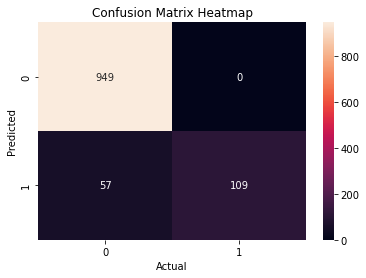

In [72]:
y_pred = model_MNB.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [73]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       949
           1       1.00      0.66      0.79       166

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.95      0.95      0.94      1115



In [74]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
print('Training Score :',model_lr.score(X_train,y_train))
print('Test Score :',model_lr.score(X_test,y_test))

Training Score : 0.9741978909580435
Test Score : 0.9533632286995516


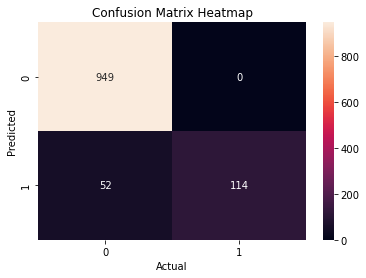

In [75]:
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [76]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       949
           1       1.00      0.69      0.81       166

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



In [77]:
text = ['Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!','Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur Soul Ur Guide And U Will Never loose in world....gnun - Sent via WAY2SMS.COM']

In [78]:
test = vectorizer.transform(text)
test_dense = test.toarray()

In [79]:
# Multinomial Navie Bayes
model_MNB.predict(test_dense)

array([1, 0])

In [80]:
#Logistic Regression
model_lr.predict(test_dense)

array([1, 0])